<a href="https://colab.research.google.com/github/M-Rezaei/ML_Project_Classification_Breast-Cancer/blob/main/Model_SVM_dataset_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
##############################################################
##############################################################
########### Model: SVM  Dataset: Breast cancer  ##############
##############################################################
##############################################################
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import pickle

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_val_score

In [26]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:
main_directory = "/content/gdrive/MyDrive/Machine_learning_projects/breast_cancer/"
df = pd.read_csv(main_directory + 'data.csv')

In [28]:
# --- dataset info---
print(df.head())
df.info()

         id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    floa

In [29]:
# We should remove the column name "Unnamed: 32".
df = df.drop('Unnamed: 32', axis=1)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [30]:
df_features = df.drop(['diagnosis', 'id'], axis=1)
target = df['diagnosis']
target = pd.Series(np.where(target == 'M', 1, 0))

In [31]:
### Normalization of data 
from sklearn import preprocessing
x = df_features.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_n = pd.DataFrame(x_scaled, columns=df_features.columns)
df_n = df_n.assign(target=target.values)
print(df_n) 

     radius_mean  texture_mean  ...  fractal_dimension_worst  target
0       0.521037      0.022658  ...                 0.418864       1
1       0.643144      0.272574  ...                 0.222878       1
2       0.601496      0.390260  ...                 0.213433       1
3       0.210090      0.360839  ...                 0.773711       1
4       0.629893      0.156578  ...                 0.142595       1
..           ...           ...  ...                      ...     ...
564     0.690000      0.428813  ...                 0.105667       1
565     0.622320      0.626987  ...                 0.074315       1
566     0.455251      0.621238  ...                 0.151909       1
567     0.644564      0.663510  ...                 0.452315       1
568     0.036869      0.501522  ...                 0.100682       0

[569 rows x 31 columns]


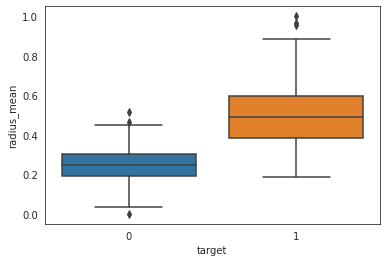

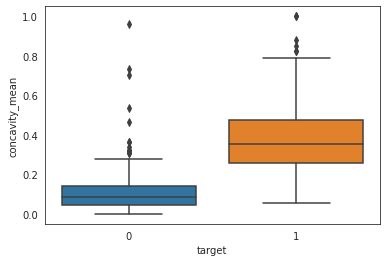

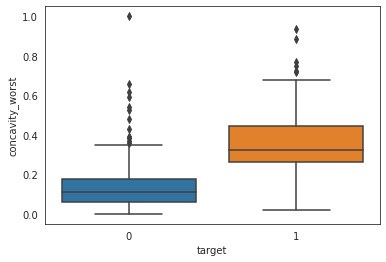

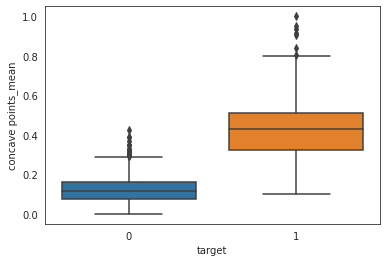

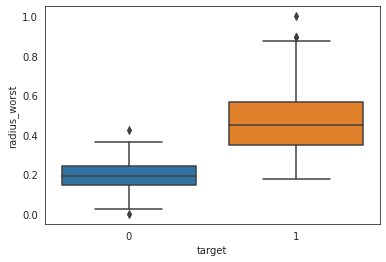

In [32]:
# -- box plot --
plt.figure()
sns.set_style('white')
ax = sns.boxplot(x='target', y='radius_mean', data=df_n)

plt.figure()
sns.set_style('white')
ax = sns.boxplot(x='target', y='concavity_mean', data=df_n)

plt.figure()
sns.set_style('white')
ax = sns.boxplot(x='target', y='concavity_worst', data=df_n)

plt.figure()
sns.set_style('white')
ax = sns.boxplot(x='target', y='concave points_mean', data=df_n)

plt.figure()
sns.set_style('white')
ax = sns.boxplot(x='target', y='radius_worst', data=df_n)



In [33]:
## Removing outliers using IQR score
#Q1 = df_n.quantile(0.25)
#Q3 = df_n.quantile(0.75)
#IQR = Q3 - Q1
#df_n = df_n[~((df_n < (Q1 - 1.5 * IQR)) |(df_n > (Q3 + 1.5 * IQR))).any(axis=1)]

#print("Shape of dataframe before removing outliers: ", df.shape)
#print("Shape of dataframe after removing outliers: ", df_n.shape)

# using IQR method we lose many data points.
# Let's try flooring and capping.

Q11 = df_n.quantile(0.11)
Q89 = df_n.quantile(0.89)
IQR =Q89 - Q11
df_n = df_n[~((df_n < (Q11 - IQR)) |(df_n > (Q89 + IQR))).any(axis=1)]
print("Shape of dataframe before removing outliers: ", df.shape)
print("Shape of dataframe after removing outliers: ", df_n.shape)

Shape of dataframe before removing outliers:  (569, 32)
Shape of dataframe after removing outliers:  (509, 31)


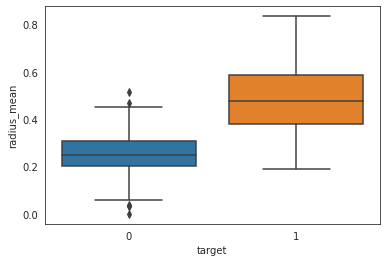

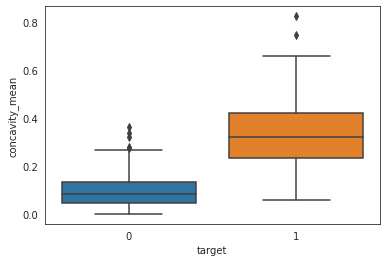

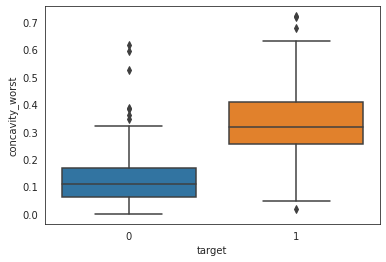

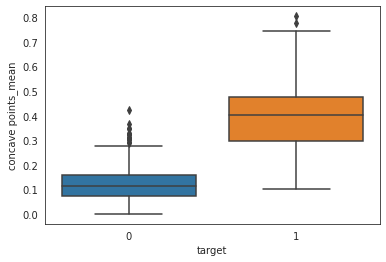

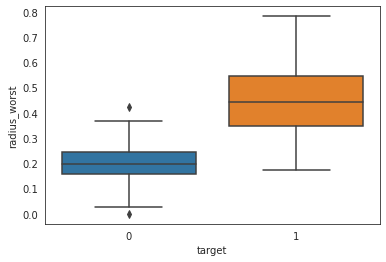

In [34]:
# -- box plot --
plt.figure()
sns.set_style('white')
ax = sns.boxplot(x='target', y='radius_mean', data=df_n)

plt.figure()
sns.set_style('white')
ax = sns.boxplot(x='target', y='concavity_mean', data=df_n)

plt.figure()
sns.set_style('white')
ax = sns.boxplot(x='target', y='concavity_worst', data=df_n)

plt.figure()
sns.set_style('white')
ax = sns.boxplot(x='target', y='concave points_mean', data=df_n)

plt.figure()
sns.set_style('white')
ax = sns.boxplot(x='target', y='radius_worst', data=df_n)



[6.05810164e+02 9.36892401e+01 6.57090238e+02 6.11065257e+02
 5.74743449e+01 3.05881100e+02 6.73140556e+02 8.48359199e+02
 5.15281661e+01 1.21199743e+00 3.27502145e+02 5.56102902e-01
 3.26756552e+02 4.77615368e+02 4.09628838e+00 6.41722417e+01
 1.05488279e+02 1.42343764e+02 7.19680468e+00 8.74635065e+00
 8.59773504e+02 1.18268739e+02 9.13167051e+02 7.77834624e+02
 1.02617751e+02 2.84386906e+02 4.78594395e+02 8.16897528e+02
 1.00262239e+02 6.75262331e+01]


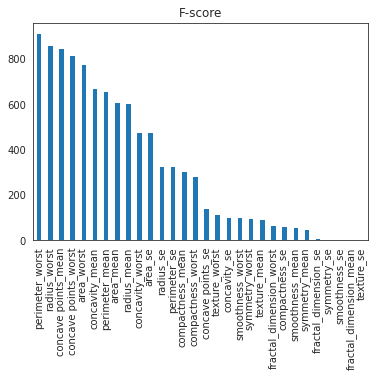

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

df_n_features = df_n.drop(['target'], axis=1)

test = SelectKBest(score_func=f_classif, k=30)
fit = test.fit(df_n_features, df_n['target'])

print(fit.scores_)

feat_imp = pd.Series(fit.scores_, index = df_n_features.keys())
feat_imp.nlargest(30).plot(kind = 'bar')
plt.title('F-score')
plt.show()

Index(['target', 'perimeter_worst', 'radius_worst', 'concave points_mean',
       'concave points_worst', 'area_worst', 'concavity_mean',
       'perimeter_mean', 'area_mean', 'radius_mean'],
      dtype='object')
[1.         0.80187265 0.79312886 0.79115701 0.78551884 0.77807242
 0.75524179 0.75131003 0.73928215 0.73783242]


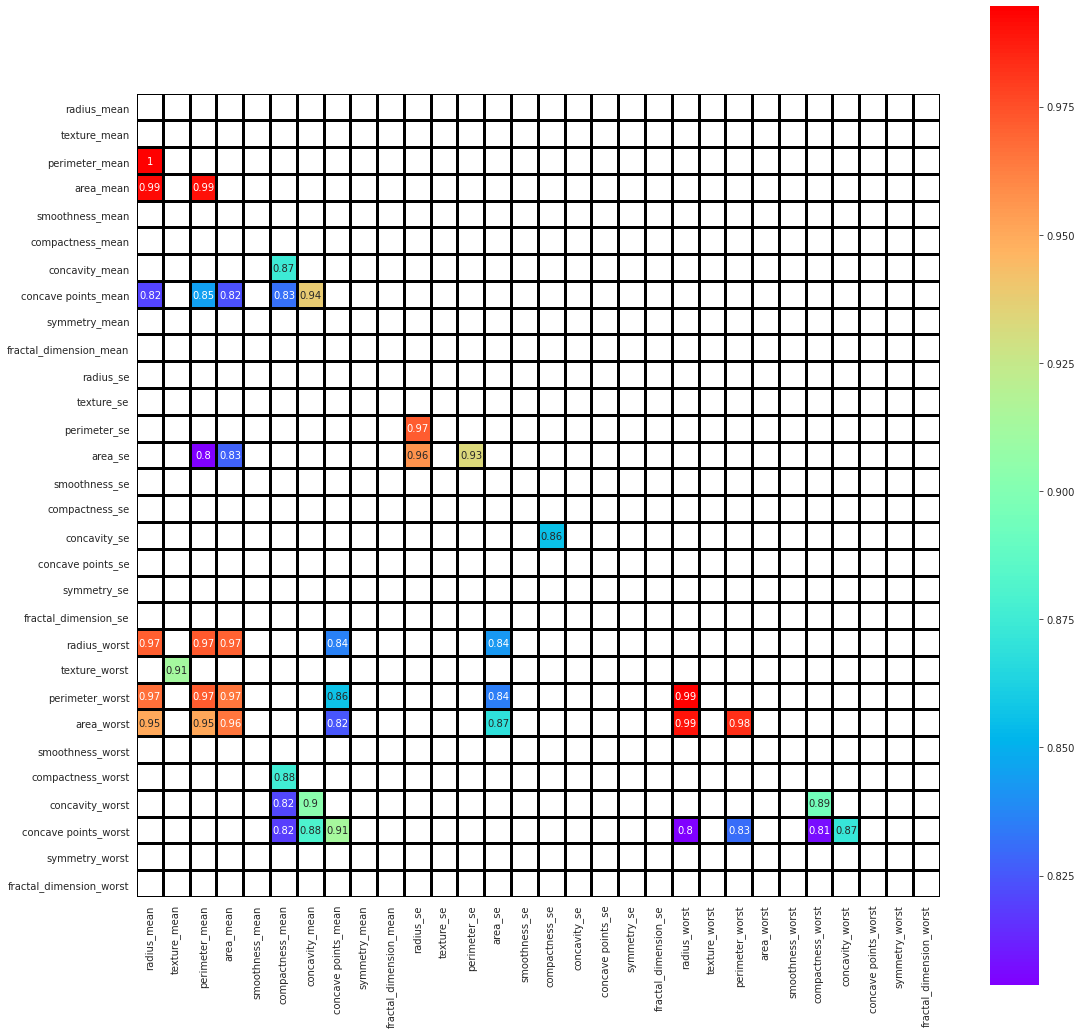

In [36]:
#--- correlation matrix ---
df_features = df_n.drop(['target'], axis=1)

corr = df_features.corr()

sns.heatmap(corr[abs(corr) > 0.80], annot=True, square=True, linewidths=2, linecolor='black', cmap='rainbow', robust=True, mask=np.triu(corr, k=0), xticklabels=True, yticklabels=True)

fig2 = plt.gcf()
fig2.set_size_inches(18,18)

fig2.savefig("correlation_matrix_sns.jpeg")

#--- Print the top four features that has the highest correlation 
#    with their indexes ---
print(df_n.corr().abs().nlargest(10, 'target').index)
print(df_n.corr().abs().nlargest(10, 'target').values[:,len(df_features.columns)])



In [37]:
# Using Anova method for feature selections and the correlation matrix, we selected the following features for our model evaluation.
# 'radius_mean', 'texture_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean', 'radius_se', 'concavity_se', 'symmetry_worst'.
selected_features_list = ['radius_mean', 'texture_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean', 'radius_se', 'concavity_se', 'symmetry_worst']
selected_features_data = df_n[['radius_mean', 'texture_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean', 'radius_se', 'concavity_se', 'symmetry_worst']]

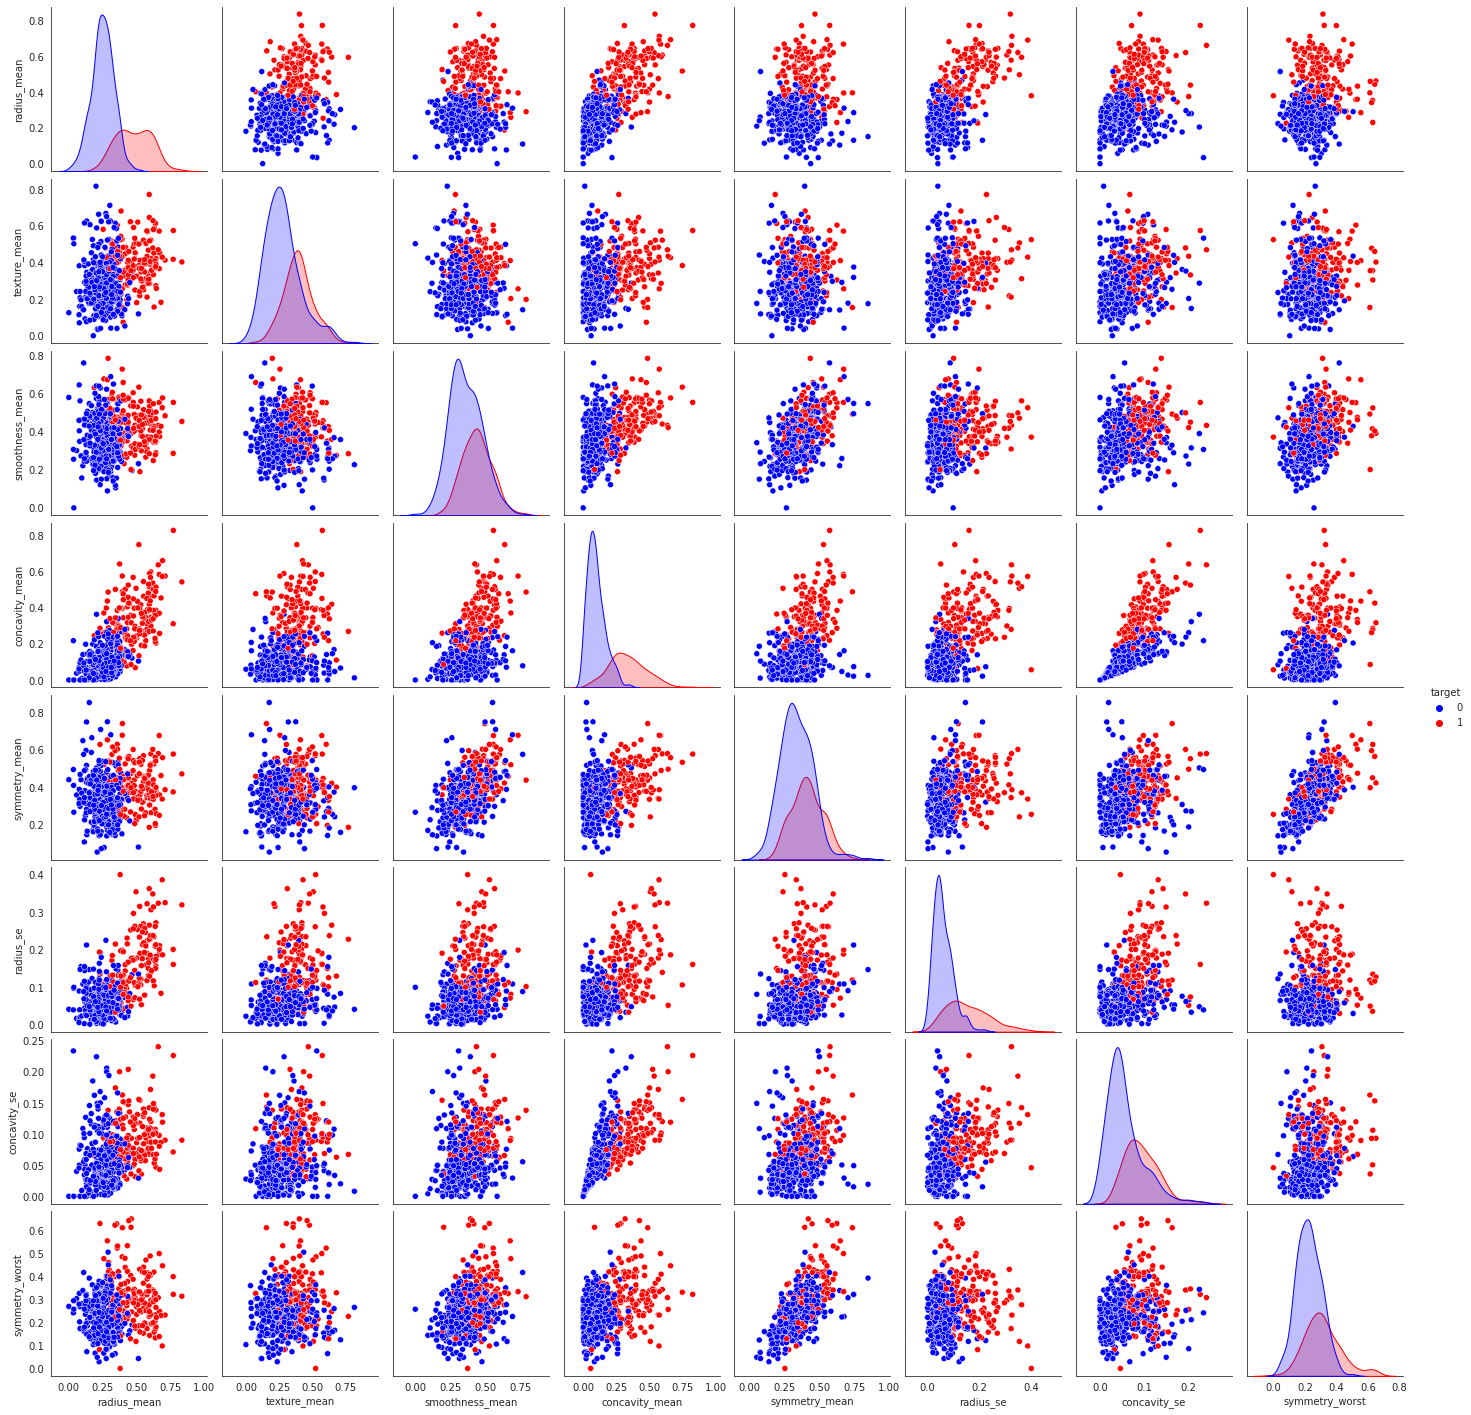

In [38]:
# Here we plot the cross-correlation among the selected features.
sns.pairplot(df_n[['target','radius_mean', 'texture_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean', 'radius_se', 'concavity_se', 'symmetry_worst']], palette = ('b', 'r'), hue='target');

In [39]:
##############################################
##############################################
############ TRAINING THE MODEL  #############
##############################################
##############################################
x = selected_features_data
target = df_n['target']

train_set, test_set, train_labels, test_labels = train_test_split(
                              x,                         # features
                              target,                    # labels,  0: benign , 1: malignant 
                              test_size = 0.30,          # split ratio
                              random_state = 4,          # set random seed
                              stratify = target)  # randomize based on labels 


from sklearn import svm

clf = svm.SVC(probability=True)
#model = GridSearchCV(clf, param_grid = {'C': np.arange(0.1, 10, 0.1), 'kernel': ['rbf', 'linear', 'poly']}, cv = 10, scoring = 'f1')
model = GridSearchCV(clf, param_grid = {'C': np.arange(0.1, 10, 0.1), 'kernel': ['linear', 'poly']}, cv = 10, scoring = 'recall')
model.fit(X = train_set,
                y = train_labels)

print('''f1-score on training set is : {} 
with parameters as: {}'''.format(model.best_score_, model.best_params_))


f1-score on training set is : 0.9166666666666666 
with parameters as: {'C': 3.9000000000000004, 'kernel': 'poly'}


In [40]:
# --- save the model ---
filename = 'svm_breast-cancer.sav'
pickle.dump(model, open(filename, 'wb'))

     Benign  Malignant  Prediction  Original Result
0  0.967425   0.032575         0.0              NaN
1  0.423411   0.576589         1.0              1.0
2  0.984463   0.015537         0.0              1.0
3  0.976333   0.023667         0.0              NaN
4  0.943761   0.056239         0.0              NaN
---Confusion Matrix---
target   0   1
row_0         
0       93   2
1        8  50


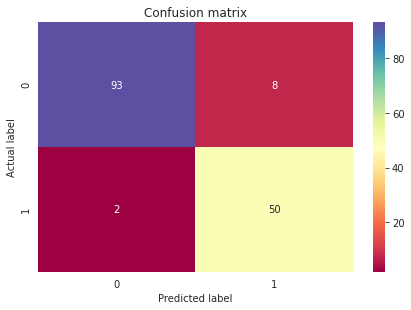

---Accuracy---
0.9615384615384616
---Metrices---
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       101
           1       0.86      0.96      0.91        52

    accuracy                           0.93       153
   macro avg       0.92      0.94      0.93       153
weighted avg       0.94      0.93      0.94       153



In [41]:
# -- testing the model
#---get the predicted probablities and convert into a dataframe---
preds_prob = pd.DataFrame(model.predict_proba(X=test_set))

#---assign column names to prediction---
preds_prob.columns = ["Benign", "Malignant"]

#---get the predicted class labels---
preds = model.predict(X=test_set)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

#---actual diagnosis---
original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]

#---merge the three dataframes into one---
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result.head()) 

# Getting the confusion matrix
#---generate table of predictions vs actual---
print("---Confusion Matrix---")
print(pd.crosstab(preds, test_labels)) 

#---view the confusion matrix---
cnf_matrix = metrics.confusion_matrix(y_true = test_labels,  # True labels
                               y_pred = preds)       # Predicted labels

#---Plot the confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Spectral" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()                    

#---get the accuracy of the prediction---
print("---Accuracy---")
print(model.score(X = test_set,
                        y = test_labels)) 

# View summary of common classification metrics
print("---Metrices---")
print(metrics.classification_report(y_true = test_labels,
                                    y_pred = preds)) 

########## ROC curve #############

#---find the predicted probabilities using the test set
probs = model.predict_proba(test_set)
preds = probs[:,1]
 
#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(test_labels, preds) 


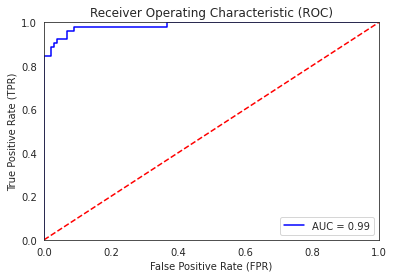

In [43]:
#---find the area under the curve---
roc_auc = auc(fpr, tpr)
fig3 = plt.figure()

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
fig3.savefig('auc')
plt.show() 

In [44]:
### load the model for new predictions ###
print ("--- check model ---")
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X = test_set,
                        y = test_labels)
print(result)

--- check model ---
0.9615384615384616
